In [1]:
#Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
stock_prices=pd.read_csv('C:/Users/80214178/Downloads/HistoricalQuotes.csv',dayfirst=True, parse_dates=[0])
stock_prices.head()

,date,close,volume,open,high,low
0,2008-09-04,26.35,66138490,26.74,26.89,26.35
1,2008-09-05,25.65,82222430,26.03,26.22,25.63
2,2008-09-08,26.12,62109170,26.21,26.33,25.67
3,2008-09-09,26.10,85693570,26.20,26.60,26.05
4,2008-09-10,26.44,75042030,26.52,26.86,26.25


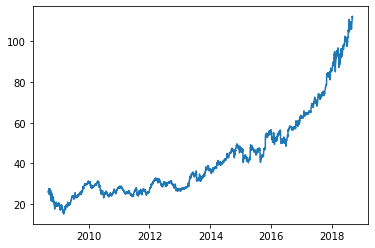

In [4]:
plt.plot(stock_prices['date'],stock_prices['close'])

In [5]:
y = stock_prices['close'].astype(np.float)
stock_prices['close']=y

In [6]:
stock_prices['lag1']=stock_prices['close'].shift(1)
stock_prices['lag2']=stock_prices['open'].shift(1)
stock_prices['lag3']=stock_prices['close'].shift(2)
stock_prices['lag4']=stock_prices['open'].shift(2)
stock_prices['lag5']=stock_prices['close'].shift(3)
stock_prices['lag6']=stock_prices['open'].shift(3)
stock_prices['lag7']=stock_prices['close'].shift(4)
stock_prices['lag8']=stock_prices['open'].shift(4)

stock_prices.head()

,date,close,volume,open,high,low,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2008-09-04,26.35,66138490,26.74,26.89,26.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-09-05,25.65,82222430,26.03,26.22,25.63,26.35,26.74,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-09-08,26.12,62109170,26.21,26.33,25.67,25.65,26.03,26.35,26.74,NaN,NaN,NaN,NaN
3,2008-09-09,26.10,85693570,26.20,26.60,26.05,26.12,26.21,25.65,26.03,26.35,26.74,NaN,NaN
4,2008-09-10,26.44,75042030,26.52,26.86,26.25,26.10,26.20,26.12,26.21,25.65,26.03,26.35,26.74


In [7]:
stock_prices.dropna(axis = 0, how = 'any', inplace = True)
stock_prices.head()

,date,close,volume,open,high,low,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
4,2008-09-10,26.44,75042030,26.52,26.86,26.25,26.10,26.20,26.12,26.21,25.65,26.03,26.35,26.74
5,2008-09-11,27.34,72899550,26.10,27.46,26.03,26.44,26.52,26.10,26.20,26.12,26.21,25.65,26.03
6,2008-09-12,27.62,75570240,27.14,27.74,26.94,27.34,26.10,26.44,26.52,26.10,26.20,26.12,26.21
7,2008-09-15,26.82,82312390,26.92,27.49,26.73,27.62,27.14,27.34,26.10,26.44,26.52,26.10,26.20
8,2008-09-16,25.99,111658400,26.09,26.49,25.52,26.82,26.92,27.62,27.14,27.34,26.10,26.44,26.52


In [8]:
data=stock_prices[stock_prices['date']>="2016-01-01"]

In [9]:
#Ahora armamos en input 
X=data[['lag1','lag2','lag3','lag4','lag5','lag6','lag7','lag8']]
Y=data[['close']]

In [10]:
train_size = int(len(data)* 0.8)
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_Y, test_Y = Y[0:train_size], Y[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train_X)))
print('Testing Observations: %d' % (len(test_Y)))

Observations: 673
Training Observations: 538
Testing Observations: 135


In [11]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0
)

In [12]:
regressor.fit(train_X,train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [13]:
y_pred = regressor.predict(test_X)

In [14]:
mean_absolute_percentage_error(test_Y, y_pred)

8.455717744841944

C:\Users\80214178\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


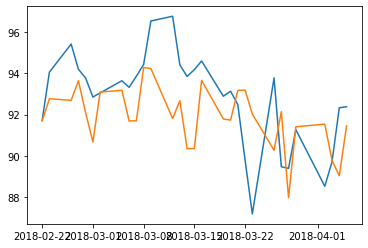

In [15]:
test_Y.index=data.iloc[train_size:len(X),0]
test_Y['pred']=y_pred
plt.plot(test_Y.iloc[0:30,])


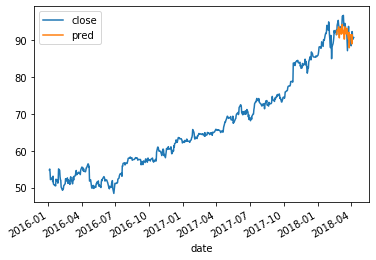

In [16]:
Y.index=data['date']
df_all = pd.merge(Y.iloc[0:570,0], test_Y.iloc[0:30,1], how = 'outer', left_index=True, right_index=True)
df_all.plot()

In [17]:
mean_absolute_percentage_error(test_Y.iloc[0:30,0], test_Y.iloc[0:30,1])

2.0404959256238633